# Image Processing SS 18 - Assignment - 02

### Deadline is 2.5.2016 at 8:00

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.


# Exercise 1 - 10 Points

Implement affine transformation with [bicubic interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation).

In [2]:
# display the plots inside the notebook
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import math
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [4]:
from skimage.data import astronaut
from skimage.color import rgb2gray

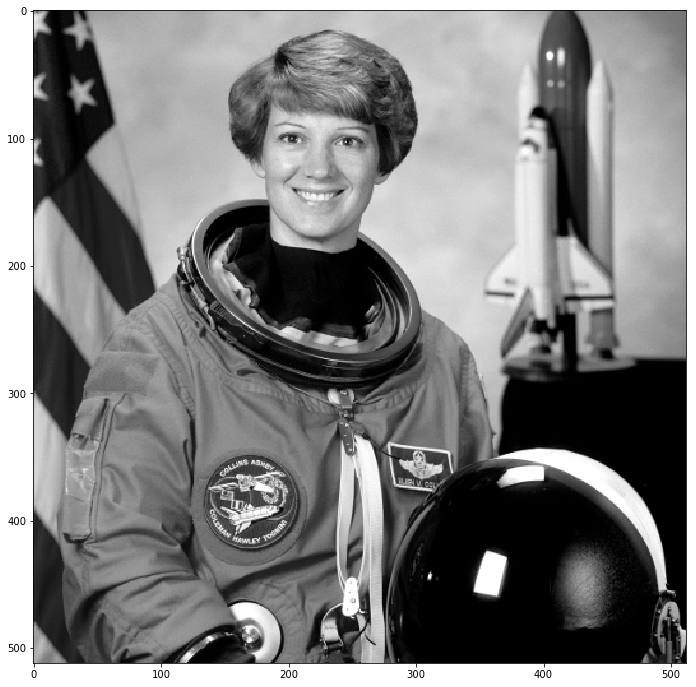

In [22]:
# We use a gray image. All the algorithms should work with color images too.
img = rgb2gray(astronaut() / 255.)
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
def derive_y(image):
    """Computes the derivative of the image w.r.t the y coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if y + 1 < image.shape[1] and y - 1 > 0:
                derived_image[x,y] = image[x, y - 1] - image[x, y + 1]
    return derived_image

def derive_x(image):
    """Computes the derivative of the image w.r.t the x coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if x + 1 < image.shape[1] and x - 1 > 0:
                derived_image[x,y] = image[x - 1, y] - image[x + 1, y]
    return derived_image

In [7]:
dx_img = derive_x(img)
dy_img = derive_y(img)

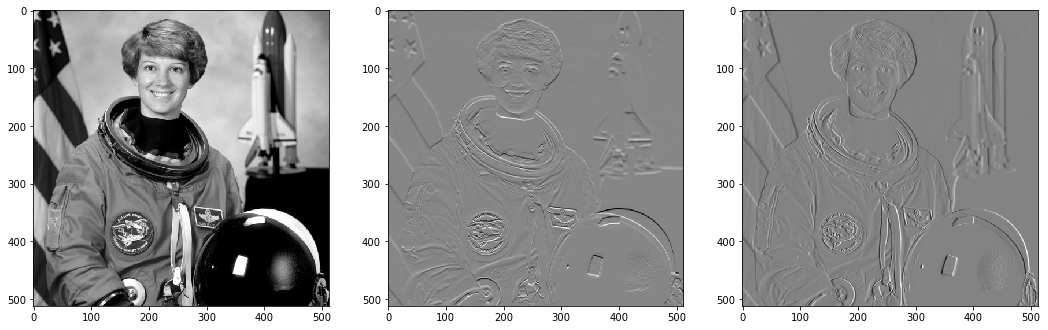

In [8]:
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(dx_img, cmap='gray')
plt.subplot(133)
plt.imshow(dy_img, cmap='gray')
plt.show()

In [9]:
# The derivatives are no longer in the range [0,1].
print("min: {}, max: {}".format(dx_img.min(), dx_img.max()))

min: -0.9896796078431372, max: 0.8965913725490197


In [10]:
indicies = np.indices(img.shape).reshape(2, -1)
print(np.indices(img.shape)[0][1])
print(np.indices(img.shape).shape)
img.shape
indicies.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

(2, 262144)

In [11]:
# pick some random index
indicies[0]

array([  0,   0,   0, ..., 511, 511, 511])

In [12]:
indicies[:, 512]

array([1, 0])

In [13]:
indicies_hg = np.concatenate([indicies, np.ones((1, indicies.shape[1]))], axis=0)
indicies_hg.shape

(3, 262144)

In [14]:
indicies_hg
indicies_hg[:, 123456]

array([ 241.,   64.,    1.])

In [15]:
T_scale = np.array([
    [0.75, 0, 0],
    [0, 0.75, 0],
    [0, 0, 1],
])

# T_scale = np.array([
#     [2, 0, 0],
#     [0, 2, 0],
#     [0, 0, 1],
# ])
# np.dot(T_affine, indicies_hg).shape, for python < 3.5
(T_scale @ indicies_hg).shape

(3, 262144)

In [16]:
T_affine = np.array([
    [1, 0.3, 0],
    [0, 1, 0],
    [0, 0, 1],
])

In [17]:
# you can use this function to invert the matricies
np.linalg.inv(T_scale)

array([[ 1.33333333,  0.        ,  0.        ],
       [ 0.        ,  1.33333333,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [18]:
def cast_seq(seq, cast):
    return [cast(e) for e in seq]

def affine_transformation(img, matrix):
    # your code here
    #erstellt indices wie oben gezeigt
    indicies = np.indices(img.shape).reshape(2, -1)
    
    #bringt indices in die richtige form für die transformation
    indicies_hg = np.concatenate([
        indicies, np.ones((1, indicies.shape[1]))], axis=0)
    
    n_indices = (matrix @ indicies_hg)
    orig_indices = (np.linalg.inv(matrix) @ n_indices)
    
    print(orig_indices)
    indices_shape = (2, img.shape[0], img.shape[1])
    orig_indices = orig_indices[:2].reshape(indices_shape)
    n_indices = n_indices[:2].reshape(indices_shape)
    
    '''
    #erstellt leeres np array für die transformierten werte
    new_indicies=np.empty([2,262144])
    
    #für jeden pixel im bild:
    #formel s.45 des 2. foliensatzes
    for i in range(0,262144):
        new_indicies[:,i]=np.matmul(np.linalg.inv(matrix),indicies_hg[:,i])[0:2]
    '''    
    n_img = bicubic_interpolation(img, (n_indices, orig_indices))
            
    return n_img

In [70]:
def val_or_max(val, max_val):
    if val > max_val:
        return max_val
    else:
        return val
    
def bicubic_interpolation(img, indicies):
    dx_img = derive_x(img)
    dy_img = derive_y(img)
    dxy_img = derive_x(dy_img)
    # your code here
    '''
    amax = np.amax(indicies, axis=0)
    requried_shape = cast_seq((amax[0] + 1, amax[1] + 1), int)
    '''
    n_indices, orig_indices = indicies
    print("n_indices", n_indices, n_indices.shape)
    print("orig_indices", orig_indices, orig_indices.shape)
    x_max = int(np.amax(np.amax(n_indices[0], axis=0))) + 1
    y_max = int(np.amax(np.amax(n_indices[0], axis=1))) + 1
    
#     print(n_indices)
    print("x_max", x_max, "y_max", y_max)
#     print("np.amax(n_indices, axis=0)", np.amax(n_indices[0], axis=0))
#     print("np.amax(n_indices, axis=1)", np.amax(n_indices[0], axis=1))
                    
    '''
    print("np.amax(n_indices, axis=0)", np.amax(np.amax(n_indices, axis=0)))
    print("np.amax(n_indices, axis=1)", np.amax(np.amax(n_indices, axis=1)))
    print(orig_indices)
    '''

    n_img = np.zeros((x_max, y_max))
    
    A_inv = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
         [-3,3,0,0,-2,-1,0,0,0,0,0,0,0,0,0,0],
         [2,-2,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
         [0,0,0,0,0,0,0,0,-3,3,0,0,-2,-1,0,0],
         [0,0,0,0,0,0,0,0,2,-2,0,0,1,1,0,0],
         [-3,0,3,0,0,0,0,0,-2,0,-1,0,0,0,0,0],
         [0,0,0,0,-3,0,3,0,0,0,0,0,-2,0,-1,0],
         [9,-9,-9,9,6,3,-6,-3,6,-6,3,-3,4,2,2,1],
         [-6,6,6,-6,-3,-3,3,3,-4,4,-2,2,-2,-2,-1,-1],
         [2,0,-2,0,0,0,0,0,1,0,1,0,0,0,0,0],
         [0,0,0,0,2,0,-2,0,0,0,0,0,1,0,1,0],
         [-6,6,6,-6,-4,-2,4,2,-3,3,-3,3,-2,-1,-2,-1],
         [4,-4,-4,4,2,2,-2,-2,2,-2,2,-2,1,1,1,1]]
    
    # print(n_img.shape)
    # print(indicies.shape)
#     print("n_indices.shape", n_indices.shape)
        
    for x in range(x_max):
        for y in range(y_max):
            
            x_new = int(n_indices[0, x, y])
            y_new = int(n_indices[1, x, y])
            
            x_orig = orig_indices[0, x, y]
            y_orig = orig_indices[1, x, y]
            
#             n_img[x, y] = img[int(x_orig), int(y_orig)]
            
            x_floored = math.floor(n_indices[0, x, y])
            y_floored = math.floor(n_indices[1, x, y])
#             print("x_floored", x_floored, "y_floored", y_floored)
            
            x_diff = math.ceil(n_indices[0, x, y]) - n_indices[0,]
            y_diff = 1 - math.round(n_indices[1, x, y])
            
            x_floored = int(x_orig)
            y_floored = int(y_orig)
            
            p00 = (
                x_floored,
                y_floored
            )
            p10 = (
                val_or_max(x_floored + 1, 511),
                y_floored
            )
            p01 = (
                x_floored,
                val_or_max(y_floored + 1, 511)
            )
            p11 = (
                val_or_max(x_floored + 1, 511),
                val_or_max(y_floored + 1, 511)
            )
            
            print(x, y,"|", x_diff, y_diff, "|", x_orig, y_orig, "->", n_indices[0, x, y], n_indices[1, x, y], "pxy", p00, p10, p01, p11)
            
            X = [
                img[p00], # f(0, 0)
                img[p10], # f(1, 0)
                img[p01], # f(0, 1)
                img[p11], # f(1, 1)

                dx_img[p00], # fx(0, 0)
                dx_img[p10], # fx(1, 0)
                dx_img[p01], # fx(0, 1)
                dx_img[p11], # fx(1, 1)

                dy_img[p00], # fy(0, 0)
                dy_img[p10], # fy(1, 0)
                dy_img[p01], # fy(0, 1)
                dy_img[p11], # fy(1, 1)

                dxy_img[p00], # fxy(0, 0)
                dxy_img[p10], # fxy(1, 0)
                dxy_img[p01], # fxy(0, 1)
                dxy_img[p11], # fxy(1, 1)
            ]
            
            alpha = np.dot(A_inv, X)
            
            a00, a10, a20, a30, a01, a11, a21, a31, \
                a02, a12, a22, a32, a03, a13, a23, a33 = alpha
            
            interpolated_val = \
                a00 * x_diff ** 0 * y_diff ** 0 + \
                a10 * x_diff ** 1 * y_diff ** 0 + \
                a10 * x_diff ** 2 * y_diff ** 0 + \
                a30 * x_diff ** 3 * y_diff ** 0 + \
                a01 * x_diff ** 0 * y_diff ** 1 + \
                a11 * x_diff ** 1 * y_diff ** 1 + \
                a21 * x_diff ** 2 * y_diff ** 1 + \
                a31 * x_diff ** 3 * y_diff ** 1 + \
                a02 * x_diff ** 0 * y_diff ** 2 + \
                a12 * x_diff ** 1 * y_diff ** 2 + \
                a22 * x_diff ** 2 * y_diff ** 2 + \
                a32 * x_diff ** 3 * y_diff ** 2 + \
                a03 * x_diff ** 0 * y_diff ** 3 + \
                a13 * x_diff ** 1 * y_diff ** 3 + \
                a23 * x_diff ** 2 * y_diff ** 3 + \
                a33 * x_diff ** 3 * y_diff ** 3
                
#             print("interpolated_val at", x, y, interpolated_val)
            n_img[x, y] = interpolated_val
            
    return n_img

In [71]:
# img = np.array([[0.5, 0.2], [0.4, 0.3]])
img_scale = affine_transformation(img, T_scale)
#img_affine = affine_transformation(img, T_affine)

[[   0.    0.    0. ...,  511.  511.  511.]
 [   0.    1.    2. ...,  509.  510.  511.]
 [   1.    1.    1. ...,    1.    1.    1.]]
n_indices [[[   0.      0.      0.   ...,    0.      0.      0.  ]
  [   0.75    0.75    0.75 ...,    0.75    0.75    0.75]
  [   1.5     1.5     1.5  ...,    1.5     1.5     1.5 ]
  ..., 
  [ 381.75  381.75  381.75 ...,  381.75  381.75  381.75]
  [ 382.5   382.5   382.5  ...,  382.5   382.5   382.5 ]
  [ 383.25  383.25  383.25 ...,  383.25  383.25  383.25]]

 [[   0.      0.75    1.5  ...,  381.75  382.5   383.25]
  [   0.      0.75    1.5  ...,  381.75  382.5   383.25]
  [   0.      0.75    1.5  ...,  381.75  382.5   383.25]
  ..., 
  [   0.      0.75    1.5  ...,  381.75  382.5   383.25]
  [   0.      0.75    1.5  ...,  381.75  382.5   383.25]
  [   0.      0.75    1.5  ...,  381.75  382.5   383.25]]] (2, 512, 512)
orig_indices [[[   0.    0.    0. ...,    0.    0.    0.]
  [   1.    1.    1. ...,    1.    1.    1.]
  [   2.    2.    2. ...,    2.    2

0 217 | 0.0 54.25 | 0.0 217.0 -> 0.0 162.75 pxy (0, 217) (1, 217) (0, 218) (1, 218)
0 218 | 0.0 54.5 | 0.0 218.0 -> 0.0 163.5 pxy (0, 218) (1, 218) (0, 219) (1, 219)
0 219 | 0.0 54.75 | 0.0 219.0 -> 0.0 164.25 pxy (0, 219) (1, 219) (0, 220) (1, 220)
0 220 | 0.0 55.0 | 0.0 220.0 -> 0.0 165.0 pxy (0, 220) (1, 220) (0, 221) (1, 221)
0 221 | 0.0 55.25 | 0.0 221.0 -> 0.0 165.75 pxy (0, 221) (1, 221) (0, 222) (1, 222)
0 222 | 0.0 55.5 | 0.0 222.0 -> 0.0 166.5 pxy (0, 222) (1, 222) (0, 223) (1, 223)
0 223 | 0.0 55.75 | 0.0 223.0 -> 0.0 167.25 pxy (0, 223) (1, 223) (0, 224) (1, 224)
0 224 | 0.0 56.0 | 0.0 224.0 -> 0.0 168.0 pxy (0, 224) (1, 224) (0, 225) (1, 225)
0 225 | 0.0 56.25 | 0.0 225.0 -> 0.0 168.75 pxy (0, 225) (1, 225) (0, 226) (1, 226)
0 226 | 0.0 56.5 | 0.0 226.0 -> 0.0 169.5 pxy (0, 226) (1, 226) (0, 227) (1, 227)
0 227 | 0.0 56.75 | 0.0 227.0 -> 0.0 170.25 pxy (0, 227) (1, 227) (0, 228) (1, 228)
0 228 | 0.0 57.0 | 0.0 228.0 -> 0.0 171.0 pxy (0, 228) (1, 228) (0, 229) (1, 229)
0 22

0 373 | 0.0 93.25 | 0.0 373.0 -> 0.0 279.75 pxy (0, 373) (1, 373) (0, 374) (1, 374)
0 374 | 0.0 93.5 | 0.0 374.0 -> 0.0 280.5 pxy (0, 374) (1, 374) (0, 375) (1, 375)
0 375 | 0.0 93.75 | 0.0 375.0 -> 0.0 281.25 pxy (0, 375) (1, 375) (0, 376) (1, 376)
0 376 | 0.0 94.0 | 0.0 376.0 -> 0.0 282.0 pxy (0, 376) (1, 376) (0, 377) (1, 377)
0 377 | 0.0 94.25 | 0.0 377.0 -> 0.0 282.75 pxy (0, 377) (1, 377) (0, 378) (1, 378)
0 378 | 0.0 94.5 | 0.0 378.0 -> 0.0 283.5 pxy (0, 378) (1, 378) (0, 379) (1, 379)
0 379 | 0.0 94.75 | 0.0 379.0 -> 0.0 284.25 pxy (0, 379) (1, 379) (0, 380) (1, 380)
0 380 | 0.0 95.0 | 0.0 380.0 -> 0.0 285.0 pxy (0, 380) (1, 380) (0, 381) (1, 381)
0 381 | 0.0 95.25 | 0.0 381.0 -> 0.0 285.75 pxy (0, 381) (1, 381) (0, 382) (1, 382)
0 382 | 0.0 95.5 | 0.0 382.0 -> 0.0 286.5 pxy (0, 382) (1, 382) (0, 383) (1, 383)
0 383 | 0.0 95.75 | 0.0 383.0 -> 0.0 287.25 pxy (0, 383) (1, 383) (0, 384) (1, 384)
1 0 | 0.25 0.0 | 1.0 0.0 -> 0.75 0.0 pxy (1, 0) (2, 0) (1, 1) (2, 1)
1 1 | 0.25 0.25 |

1 114 | 0.25 28.5 | 1.0 114.0 -> 0.75 85.5 pxy (1, 114) (2, 114) (1, 115) (2, 115)
1 115 | 0.25 28.75 | 1.0 115.0 -> 0.75 86.25 pxy (1, 115) (2, 115) (1, 116) (2, 116)
1 116 | 0.25 29.0 | 1.0 116.0 -> 0.75 87.0 pxy (1, 116) (2, 116) (1, 117) (2, 117)
1 117 | 0.25 29.25 | 1.0 117.0 -> 0.75 87.75 pxy (1, 117) (2, 117) (1, 118) (2, 118)
1 118 | 0.25 29.5 | 1.0 118.0 -> 0.75 88.5 pxy (1, 118) (2, 118) (1, 119) (2, 119)
1 119 | 0.25 29.75 | 1.0 119.0 -> 0.75 89.25 pxy (1, 119) (2, 119) (1, 120) (2, 120)
1 120 | 0.25 30.0 | 1.0 120.0 -> 0.75 90.0 pxy (1, 120) (2, 120) (1, 121) (2, 121)
1 121 | 0.25 30.25 | 1.0 121.0 -> 0.75 90.75 pxy (1, 121) (2, 121) (1, 122) (2, 122)
1 122 | 0.25 30.5 | 1.0 122.0 -> 0.75 91.5 pxy (1, 122) (2, 122) (1, 123) (2, 123)
1 123 | 0.25 30.75 | 1.0 123.0 -> 0.75 92.25 pxy (1, 123) (2, 123) (1, 124) (2, 124)
1 124 | 0.25 31.0 | 1.0 124.0 -> 0.75 93.0 pxy (1, 124) (2, 124) (1, 125) (2, 125)
1 125 | 0.25 31.25 | 1.0 125.0 -> 0.75 93.75 pxy (1, 125) (2, 125) (1, 126) (

KeyboardInterrupt: 

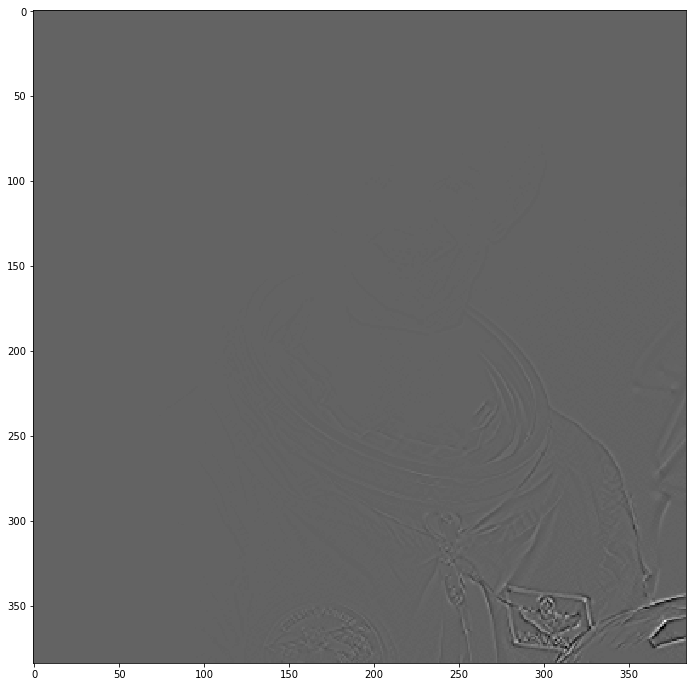

In [67]:
plt.imshow(img_scale, cmap='gray')
plt.show()

In [25]:
print(plt.imshow(img_affine, interpolation="bicubic", cmap="gray"))
plt.imshow(img_affine, cmap='gray')
plt.show()

NameError: name 'img_affine' is not defined